In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

650

In [6]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | guatire
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | borogontsy
Processing Record 9 of Set 1 | isla mujeres
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | mogadishu
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | campbellsville
Processing Record 21 of Set 1 | san felipe
Processing Record 22 of Set 1 | hamilton
Processing

Processing Record 38 of Set 4 | karamea
City not found. Skipping...
Processing Record 39 of Set 4 | le port
Processing Record 40 of Set 4 | george town
Processing Record 41 of Set 4 | marystown
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | druzhba
Processing Record 46 of Set 4 | ladovskaya balka
Processing Record 47 of Set 4 | sawakin
Processing Record 48 of Set 4 | chiredzi
Processing Record 49 of Set 4 | hope mills
Processing Record 50 of Set 4 | turayf
Processing Record 1 of Set 5 | sakakah
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | eirunepe
Processing Record 4 of Set 5 | bambanglipuro
Processing Record 5 of Set 5 | presidente epitacio
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | deputatskiy
Processing Record 8 of Set 5 | geraldton
Processing Record 9 of Set 5 | humberto de campos
Proces

Processing Record 22 of Set 8 | ponta delgada
Processing Record 23 of Set 8 | mehran
Processing Record 24 of Set 8 | yulara
Processing Record 25 of Set 8 | saint george
Processing Record 26 of Set 8 | general salgado
Processing Record 27 of Set 8 | itaituba
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | dalvik
Processing Record 30 of Set 8 | chimoio
Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | fort nelson
Processing Record 33 of Set 8 | minas
Processing Record 34 of Set 8 | shelton
Processing Record 35 of Set 8 | aksu
Processing Record 36 of Set 8 | lujan
Processing Record 37 of Set 8 | claveria
Processing Record 38 of Set 8 | mombasa
Processing Record 39 of Set 8 | kjollefjord
Processing Record 40 of Set 8 | labranzagrande
Processing Record 41 of Set 8 | preston
Processing Record 42 of Set 8 | mariano escobedo
Processing Record 43 of Set 8 | aramaywan
City not found. Skipping...
Processing Record 44 of Set 8 | vaitape
Processing Recor

Processing Record 15 of Set 12 | cap malheureux
Processing Record 16 of Set 12 | davidson
Processing Record 17 of Set 12 | suba
Processing Record 18 of Set 12 | roma
Processing Record 19 of Set 12 | rahuri
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | san quintin
Processing Record 23 of Set 12 | reyes
Processing Record 24 of Set 12 | pryazha
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | vilhena
Processing Record 27 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 12 | moscow
Processing Record 29 of Set 12 | periyanegamam
Processing Record 30 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 31 of Set 12 | jupiter
Processing Record 32 of Set 12 | avera
Processing Record 33 of Set 12 | kamiiso
Processing Record 34 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 12 | hervey bay
Processing Record 36 of Se

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.02,65,100,8.37,PF,2021-11-20 17:30:11
1,Richards Bay,-28.7830,32.0377,67.59,66,97,5.64,ZA,2021-11-20 17:30:12
2,Busselton,-33.6500,115.3333,59.54,69,52,11.39,AU,2021-11-20 17:30:12
3,Guatire,10.4762,-66.5427,80.33,81,65,4.52,VE,2021-11-20 17:30:13
4,Kruisfontein,-34.0033,24.7314,61.88,77,69,12.46,ZA,2021-11-20 17:30:13
5,Ushuaia,-54.8000,-68.3000,38.86,65,75,21.85,AR,2021-11-20 17:28:17
6,Provideniya,64.3833,-173.3000,8.64,59,11,4.00,RU,2021-11-20 17:30:14
7,Borogontsy,62.6683,131.1683,-25.37,100,77,0.47,RU,2021-11-20 17:30:14
8,Isla Mujeres,21.2311,-86.7310,82.45,81,100,8.68,MX,2021-11-20 17:30:15
9,Bluff,-46.6000,168.3333,52.27,94,100,6.22,NZ,2021-11-20 17:30:15


In [9]:
#Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-11-20 17:30:11,-23.1203,-134.9692,73.02,65,100,8.37
1,Richards Bay,ZA,2021-11-20 17:30:12,-28.7830,32.0377,67.59,66,97,5.64
2,Busselton,AU,2021-11-20 17:30:12,-33.6500,115.3333,59.54,69,52,11.39
3,Guatire,VE,2021-11-20 17:30:13,10.4762,-66.5427,80.33,81,65,4.52
4,Kruisfontein,ZA,2021-11-20 17:30:13,-34.0033,24.7314,61.88,77,69,12.46
5,Ushuaia,AR,2021-11-20 17:28:17,-54.8000,-68.3000,38.86,65,75,21.85
6,Provideniya,RU,2021-11-20 17:30:14,64.3833,-173.3000,8.64,59,11,4.00
7,Borogontsy,RU,2021-11-20 17:30:14,62.6683,131.1683,-25.37,100,77,0.47
8,Isla Mujeres,MX,2021-11-20 17:30:15,21.2311,-86.7310,82.45,81,100,8.68
9,Bluff,NZ,2021-11-20 17:30:15,-46.6000,168.3333,52.27,94,100,6.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

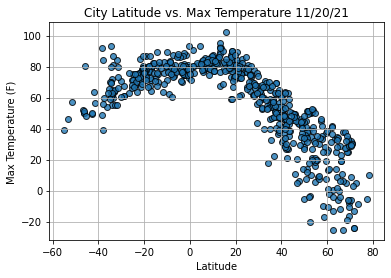

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

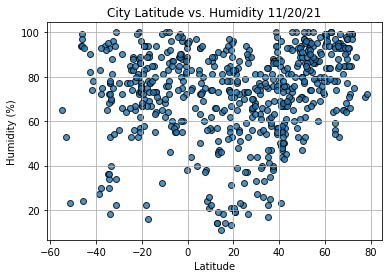

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

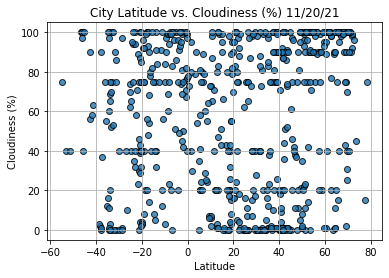

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

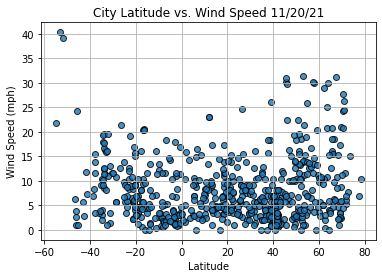

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()